## This code 
1. generates synthetic sea-level curves different amplitude and frequency, based on the sine function 
2. exports the curves in the format required by BADLANDS

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

In [2]:
# Getting the right number of points for the required temporal resolution
geo_wave_100=np.arange(-3*np.pi, -1*np.pi, (((3*np.pi)-(1*np.pi))/1e2))
geo_wave_1000=np.arange(-3*np.pi, -1*np.pi, (((3*np.pi)-(1*np.pi))/1e3)); #print (len(geo_wave_1000))
geo_wave_10000=np.arange(-3*np.pi, -1*np.pi, (((3*np.pi)-(1*np.pi))/1e4)); #print (len(geo_wave_1000))

start_time=2e6
end_time=12e6
res100k= 1e5
res10k= 1e4
res1k=1e3
years_res1k=(np.arange(start_time,end_time,res1k))
years_res10k=(np.arange(start_time,end_time,res10k))
years_res100k=(np.arange(start_time,end_time,res100k))

print ('number of points in geo_wave_100',len(geo_wave_100))
print( 'number of points in years_res100k',(len(years_res100k)))
print('temporal resultion of years_res100k is', years_res100k[1]-years_res100k[0])


print ('number of points in years_res10k', (len(years_res10k)))
print ('number of points in geo_wave_1000',len(geo_wave_1000))
print('temporal resultion of years_res10k is', years_res10k[1]-years_res10k[0])

number of points in geo_wave_100 100
number of points in years_res100k 100
temporal resultion of years_res100k is 100000.0
number of points in years_res10k 1000
number of points in geo_wave_1000 1000
temporal resultion of years_res10k is 10000.0


In [3]:
A25m=25 #This means amplitude is -25 and +25
f_0_1Ma=-10e6/.1e6 #100 full cycles, a cycle every 0.1 Ma I made negative so that SL is low and delta progrades easily
f_0_5Ma=-10e6/.5e6 #20 full cycles, a cycle every 0.5 Ma I made negative so that SL is low and delta progrades easily
f_5Ma=-10e6/5e6 #2 full cycles, a cycle every 5 Ma I made negative so that SL is low and delta progrades easily

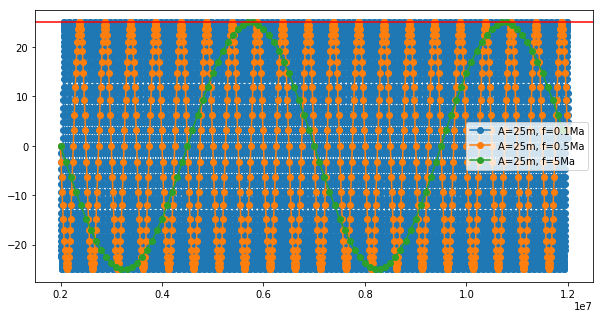

In [4]:
#Testing different resolutions
rounding=2
plt.figure(figsize=(10,5))
plt.plot(years_res1k,np.round(np.sin(geo_wave_10000*f_0_1Ma),rounding)*A25m, '-o',label="A=25m, f=0.1Ma")
plt.plot(years_res10k,np.round(np.sin(geo_wave_1000*f_0_5Ma),rounding)*A25m, '-o',label="A=25m, f=0.5Ma")
plt.plot(years_res100k,np.round(np.sin(geo_wave_100*f_5Ma),rounding)*A25m, '-o',label="A=25m, f=5Ma")
plt.axhline(max(np.round(np.sin(geo_wave_100*f_5Ma),rounding)*A25m), c='r')# Making sure that the maximum values actually go to 25, that's why I need to do the rounding 
plt.legend()

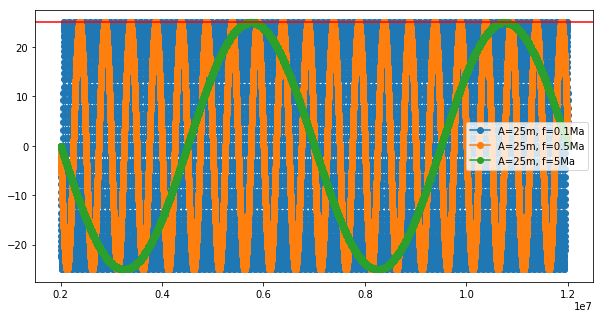

In [5]:
#Testing different resolutions

rounding=2
plt.figure(figsize=(10,5))
plt.plot(years_res1k,np.round(np.sin(geo_wave_10000*f_0_1Ma),rounding)*A25m, '-o',label="A=25m, f=0.1Ma")
plt.plot(years_res1k,np.round(np.sin(geo_wave_10000*f_0_5Ma),rounding)*A25m, '-o',label="A=25m, f=0.5Ma")
plt.plot(years_res1k,np.round(np.sin(geo_wave_10000*f_5Ma),rounding)*A25m, '-o',label="A=25m, f=5Ma")
plt.axhline(max(np.round(np.sin(geo_wave_100*f_5Ma),rounding)*A25m), c='r')# Making sure that the maximum values actually go to 25, that's why I need to do the rounding 
plt.legend()

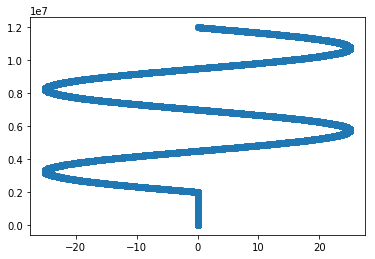

In [6]:
x=np.append(np.zeros(len(np.arange(0,2e6,res1k))), np.round(np.sin(geo_wave_10000*f_5Ma),rounding)*A25m)
y=np.append(np.arange(0,2e6,res1k), years_res1k)
plt.plot(x,y, '-o') 
df=pd.DataFrame(x,y) 
df.to_csv('../2_model_running/data/f5Myr_A25m.csv', header=False, sep=' ')#badlands requires the file to be space separated, not coma


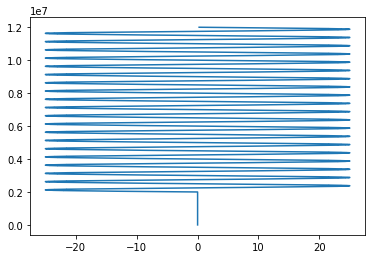

In [7]:
x=np.append(np.zeros(len(np.arange(0,2e6,res1k))), np.round(np.sin(geo_wave_10000*f_0_5Ma),rounding)*A25m)
y=np.append(np.arange(0,2e6,res1k), years_res1k)
plt.plot(x,y) 
df=pd.DataFrame(x,y) 
df.to_csv('../2_model_running/data/f500Kyr_A25m.csv', header=False, sep=' ')#badlands requires the file to be space separated, not coma
